This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


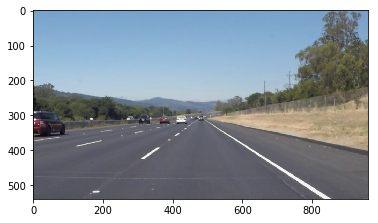

In [35]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image) 

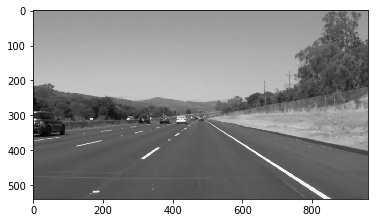

In [36]:
def grayscale(img):
        return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = grayscale(image)  #Turning RGB image to grayscale
plt.imshow(gray,cmap='gray') 


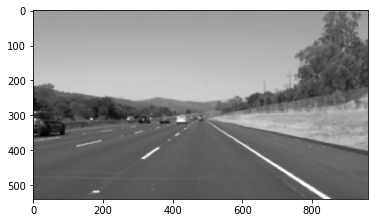

In [37]:
def gaussian_blur(img, kernel_size):
        return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
kernel_size = 9
blur_gray = gaussian_blur(gray,kernel_size) #setting gaussian blur for the image
plt.imshow(blur_gray,cmap='gray')

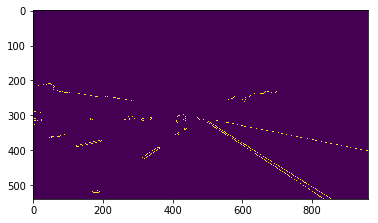

In [38]:

def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)
low_threshold = 90
high_threshold = 180
edges = canny(blur_gray, low_threshold, high_threshold) #Applying Canny edge detection
plt.imshow(edges)

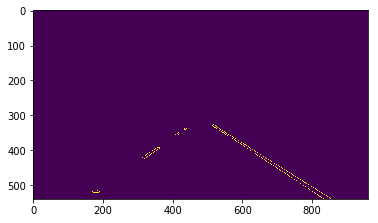

In [39]:
def region_of_interest(img, vertices):
    
    mask = np.zeros_like(img)   
    
    if len(img.shape) > 2:
        channel_count = img.shape[2]  
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
        
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
    
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 325), (550, 325), (imshape[1],imshape[0])]], dtype=np.int32)  
masked_edges = region_of_interest(edges, vertices)
plt.imshow(masked_edges)

In [40]:
def draw_lines(img, lines, color=[255, 0, 0], thickness=7):
    
    left_lines = []
    left_slopes = []
    right_lines = []
    right_slopes = []
    
    
    right_x = []
    right_y = []
    left_x = []
    left_y = []

    #Statement to sort slope and intercept of line that fits data points
    for line in lines:
        for x1,y1,x2,y2 in line:
            slope = (y2-y1)/(x2-x1)
            intercept = y1 - slope*x1
            if slope < 0:
                left_lines.append((slope, intercept))
                left_x.extend((x1,x2))
                left_y.extend((y1,y2))
                
            else:
                right_lines.append((slope , intercept))
                right_x.extend((x1,x2))
                right_y.extend((y1,y2))
                

    y1= img.shape[0]
    y2 = y1*0.6 

    #Simple fit for data points
    left_slp, left_int = np.polyfit(left_x,left_y,1)
    right_slp, right_int = np.polyfit(right_x,right_y,1)
    
    #generate values of x
    right_x1 = (y1-right_int)/right_slp
    right_x2 = (y2-right_int)/right_slp
    
    left_x1 = (y1-left_int)/left_slp
    left_x2 = (y2-left_int)/left_slp
    
    # Convert all to int
    y1 = int(y1)
    y2 = int(y2)
    right_x1 = int(right_x1)
    right_x2 = int(right_x2)
    left_x1 = int(left_x1)
    left_x2 = int(left_x2)

    cv2.line(img,(left_x1,y1),(left_x2,y2),color,thickness)
    cv2.line(img,(right_x1,y1),(right_x2,y2),color,thickness)



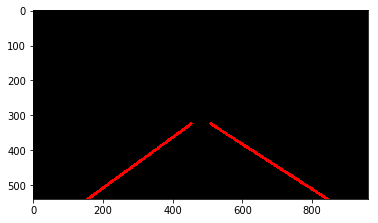

In [41]:
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img
    
rho = 0.8 
theta = np.pi/180
threshold = 25   
min_line_len = 50 
max_line_gap = 200

line_image = hough_lines(masked_edges, rho, theta, threshold, min_line_len, max_line_gap)
plt.imshow(line_image)

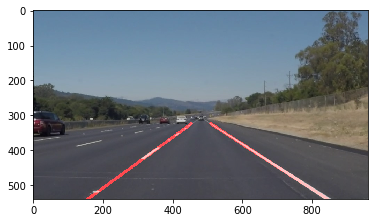

In [42]:
def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    return cv2.addWeighted(initial_img, α, img, β, λ)
lines_edges = weighted_img(line_image, image, α=0.8, β=1., λ=0.)
plt.imshow(lines_edges)
    
plt.show()